In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Load 10K episode dataset

In [2]:
path = 'training_10k_episodes4.csv.gz'

In [3]:
rdf = pd.read_csv(path, dtype={'num_decks': str, 'epsilon': str, 'eta': str, 'gamma': str})

In [4]:
rdf.shape

(24334431, 11)

In [5]:
rdf.head()

,num_episodes,num_decks,epsilon,eta,gamma,episode,action,action_num,reward,wins,winrate
0,10000,1,0.1,0.1,0.2,0,0,1,-5.000000,0,0.0
1,10000,1,0.1,0.1,0.2,1,0,1,-2.500000,0,0.0
2,10000,1,0.1,0.1,0.2,1,0,2,-5.000000,0,0.0
3,10000,1,0.1,0.1,0.2,2,0,1,-3.333333,0,0.0
4,10000,1,0.1,0.1,0.2,2,0,2,-5.000000,0,0.0


In [6]:
rdf.winrate.describe()

count    2.433443e+07
mean     3.722161e+01
std      3.399526e+00
min      0.000000e+00
25%      3.641750e+01
50%      3.789995e+01
75%      3.906896e+01
max      1.000000e+02
Name: winrate, dtype: float64

# Explore

## Decks

In [7]:
rdf.groupby('num_decks').winrate.mean()

num_decks
1    37.435343
2    37.216685
3    37.232701
4    37.122205
5    37.154177
6    37.169278
Name: winrate, dtype: float64

In [8]:
rdf.groupby('num_decks').winrate.median()

num_decks
1    38.076379
2    37.889010
3    37.908497
4    37.839001
5    37.834574
6    37.851929
Name: winrate, dtype: float64

In [9]:
rdf.groupby('num_decks').reward.median()

num_decks
1   -0.608901
2   -0.614171
3   -0.615044
4   -0.614440
5   -0.614589
6   -0.617082
Name: reward, dtype: float64

In [10]:
ddf = rdf.groupby(['num_episodes', 'num_decks', 'episode'], as_index=False)[['reward', 'wins', 'winrate']].mean()

In [11]:
ddf.head()

,num_episodes,num_decks,episode,reward,wins,winrate
0,10000,1,0,-2.181979,0.053004,5.300353
1,10000,1,1,-2.998175,0.166058,8.302920
2,10000,1,2,-3.156286,0.266436,8.881200
3,10000,1,3,-3.334386,0.375451,9.386282
4,10000,1,4,-3.357914,0.532374,10.647482


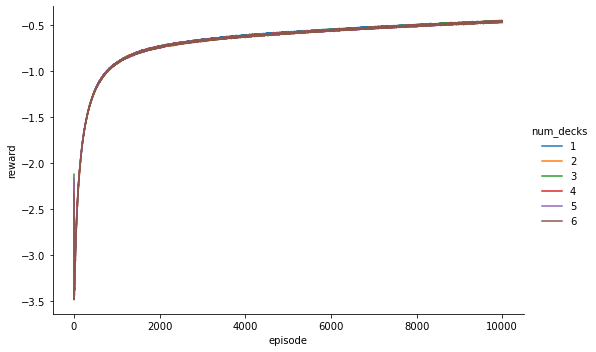

In [12]:
g = sns.relplot(x='episode', y='reward', hue='num_decks', data=ddf, kind='line', aspect=1.5)

## Epsilon

In [13]:
epsdf = rdf.groupby(['num_episodes', 'epsilon', 'episode'], as_index=False)[['reward', 'wins', 'winrate']].mean()

In [14]:
epsdf.head()

,num_episodes,epsilon,episode,reward,wins,winrate
0,10000,0.1,0,-2.447405,0.022440,2.244039
1,10000,0.1,1,-3.478107,0.066384,3.319209
2,10000,0.1,2,-3.732691,0.107290,3.576341
3,10000,0.1,3,-3.908563,0.168360,4.208999
4,10000,0.1,4,-3.952514,0.273743,5.474860


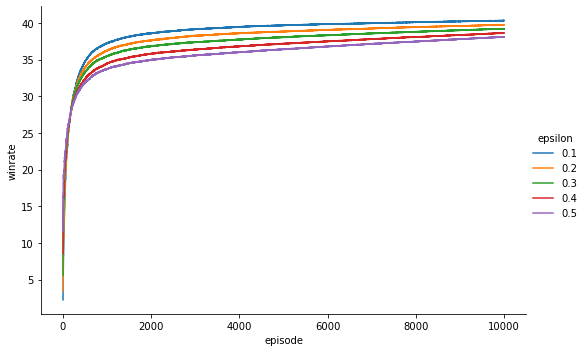

In [15]:
g = sns.relplot(x='episode', y='winrate', hue='epsilon', data=epsdf, kind='line', aspect=1.5)

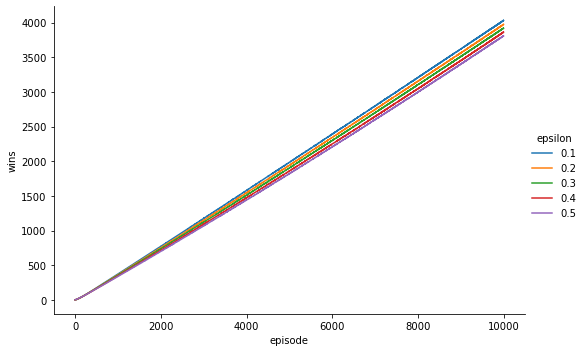

In [16]:
g = sns.relplot(x='episode', y='wins', hue='epsilon', data=epsdf, kind='line', aspect=1.5)

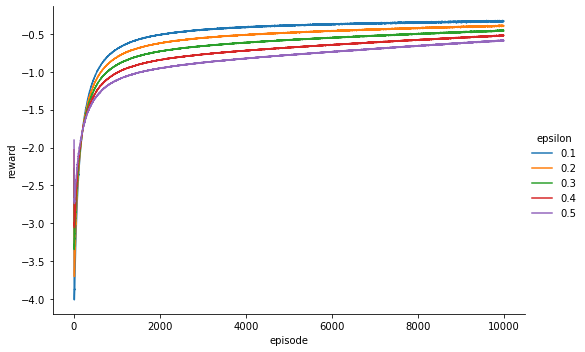

In [17]:
g = sns.relplot(x='episode', y='reward', hue='epsilon', data=epsdf, kind='line', aspect=1.5)

## Eta

In [18]:
etadf = rdf.groupby(['num_episodes', 'eta', 'episode'], as_index=False)[['reward', 'wins', 'winrate']].mean()

In [19]:
etadf.head()

,num_episodes,eta,episode,reward,wins,winrate
0,10000,0.1,0,-2.215457,0.063232,6.323185
1,10000,0.1,1,-2.901136,0.218182,10.909091
2,10000,0.1,2,-3.240233,0.311721,10.390690
3,10000,0.1,3,-3.339372,0.422705,10.567633
4,10000,0.1,4,-3.374882,0.554502,11.090047


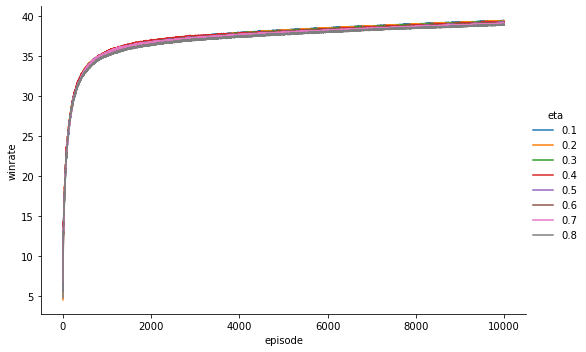

In [20]:
g = sns.relplot(x='episode', y='winrate', hue='eta', data=etadf, kind='line', aspect=1.5)

## Gamma

In [21]:
gdf = rdf.groupby(['num_episodes', 'gamma', 'episode'], as_index=False)[['reward', 'wins', 'winrate']].mean()

In [22]:
gdf.head()

,num_episodes,gamma,episode,reward,wins,winrate
0,10000,0.2,0,-2.081535,0.079137,7.913669
1,10000,0.2,1,-2.894432,0.176334,8.816705
2,10000,0.2,2,-3.201923,0.278846,9.294872
3,10000,0.2,3,-3.296020,0.410448,10.261194
4,10000,0.2,4,-3.313397,0.559809,11.196172


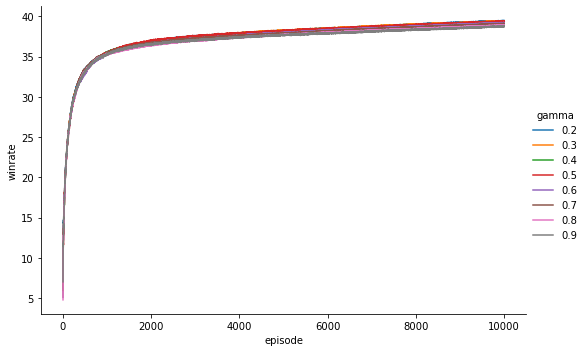

In [23]:
g = sns.relplot(x='episode', y='winrate', hue='gamma', data=gdf, kind='line', aspect=1.5)

## Number of Actions

## By gamma

In [24]:
gdf = rdf.groupby(['num_episodes', 'gamma', 'episode'], as_index=False)[['reward', 'wins', 'winrate', 'action_num']].agg([sum, 'mean'])
gdf.columns = [f"{col}_{agg}" for col, agg in gdf.columns]
gdf.reset_index(inplace=True)

In [27]:
gdf.head()

,num_episodes,gamma,episode,reward_sum,reward_mean,wins_sum,wins_mean,winrate_sum,winrate_mean,action_num_sum,action_num_mean
0,10000,0.2,0,-868.0,-2.081535,33,0.079137,3300.000000,7.913669,651,1.561151
1,10000,0.2,1,-1247.5,-2.894432,76,0.176334,3800.000000,8.816705,699,1.621810
2,10000,0.2,2,-1332.0,-3.201923,116,0.278846,3866.666667,9.294872,649,1.560096
3,10000,0.2,3,-1325.0,-3.296020,165,0.410448,4125.000000,10.261194,616,1.532338
4,10000,0.2,4,-1385.0,-3.313397,234,0.559809,4680.000000,11.196172,646,1.545455


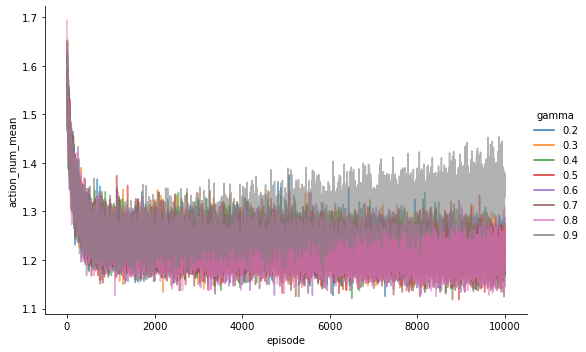

In [28]:
g = sns.relplot(x='episode', y='action_num_mean', hue='gamma', data=gdf, kind='line', aspect=1.5, alpha=0.6)

## By eta

In [29]:
gdf = rdf.groupby(['num_episodes', 'eta', 'episode'], as_index=False)[['reward', 'wins', 'winrate', 'action_num']].agg([sum, 'mean'])
gdf.columns = [f"{col}_{agg}" for col, agg in gdf.columns]
gdf.reset_index(inplace=True)

In [30]:
gdf.head()

,num_episodes,eta,episode,reward_sum,reward_mean,wins_sum,wins_mean,winrate_sum,winrate_mean,action_num_sum,action_num_mean
0,10000,0.1,0,-946.000000,-2.215457,27,0.063232,2700.000000,6.323185,696,1.629977
1,10000,0.1,1,-1276.500000,-2.901136,96,0.218182,4800.000000,10.909091,716,1.627273
2,10000,0.1,2,-1299.333333,-3.240233,125,0.311721,4166.666667,10.390690,606,1.511222
3,10000,0.1,3,-1382.500000,-3.339372,175,0.422705,4375.000000,10.567633,646,1.560386
4,10000,0.1,4,-1424.200000,-3.374882,234,0.554502,4680.000000,11.090047,664,1.573460


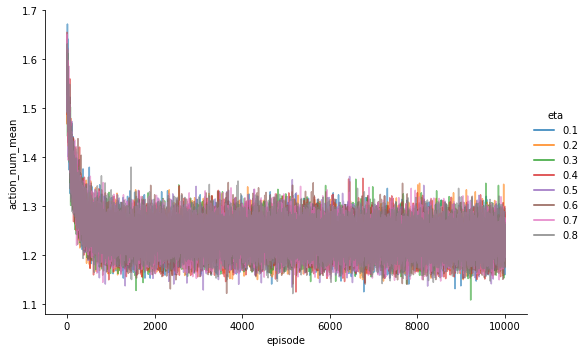

In [31]:
g = sns.relplot(x='episode', y='action_num_mean', hue='eta', data=gdf, kind='line', aspect=1.5, alpha=0.6)

## By epsilon

In [32]:
gdf = rdf.groupby(['num_episodes', 'epsilon', 'episode'], as_index=False)[['reward', 'wins', 'winrate', 'action_num']].agg([sum, 'mean'])
gdf.columns = [f"{col}_{agg}" for col, agg in gdf.columns]
gdf.reset_index(inplace=True)

In [33]:
gdf.head()

,num_episodes,epsilon,episode,reward_sum,reward_mean,wins_sum,wins_mean,winrate_sum,winrate_mean,action_num_sum,action_num_mean
0,10000,0.1,0,-1745.000000,-2.447405,16,0.022440,1600.0,2.244039,1176,1.649369
1,10000,0.1,1,-2462.500000,-3.478107,47,0.066384,2350.0,3.319209,1165,1.645480
2,10000,0.1,2,-2713.666667,-3.732691,78,0.107290,2600.0,3.576341,1233,1.696011
3,10000,0.1,3,-2693.000000,-3.908563,116,0.168360,2900.0,4.208999,1108,1.608128
4,10000,0.1,4,-2830.000000,-3.952514,196,0.273743,3920.0,5.474860,1194,1.667598


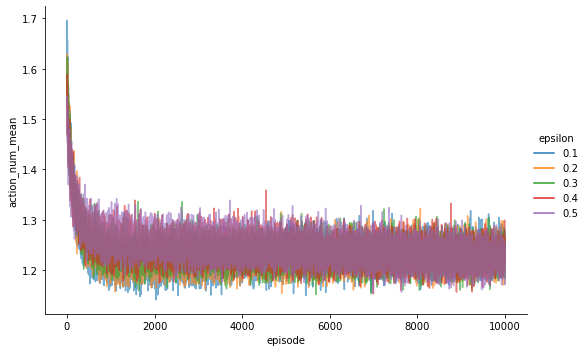

In [34]:
g = sns.relplot(x='episode', y='action_num_mean', hue='epsilon', data=gdf, kind='line', aspect=1.5, alpha=0.6)

## Probability of staying

## By gamma

In [36]:
gdf = rdf.groupby(['num_episodes', 'gamma', 'episode'], as_index=False)[['action']].mean()

In [37]:
gdf.head()

,num_episodes,gamma,episode,action
0,10000,0.2,0,0.158273
1,10000,0.2,1,0.129930
2,10000,0.2,2,0.187500
3,10000,0.2,3,0.164179
4,10000,0.2,4,0.205742


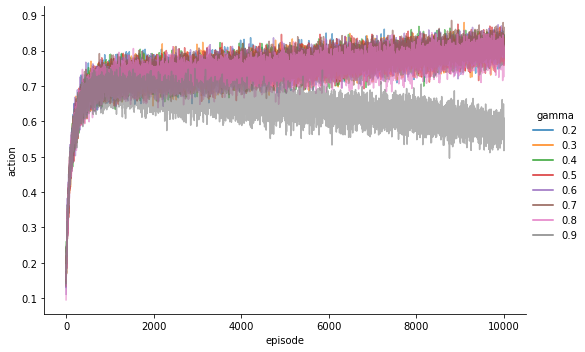

In [38]:
g = sns.relplot(x='episode', y='action', hue='gamma', data=gdf, kind='line', aspect=1.5, alpha=0.6)

## By eta

In [39]:
gdf = rdf.groupby(['num_episodes', 'eta', 'episode'], as_index=False)[['action']].mean()

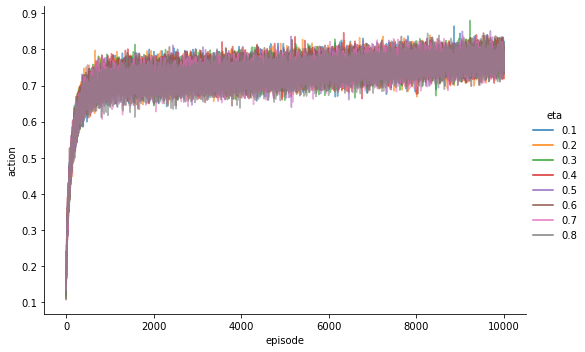

In [40]:
g = sns.relplot(x='episode', y='action', hue='eta', data=gdf, kind='line', aspect=1.5, alpha=0.6)

## By epsilon

In [41]:
gdf = rdf.groupby(['num_episodes', 'epsilon', 'episode'], as_index=False)[['action']].mean()

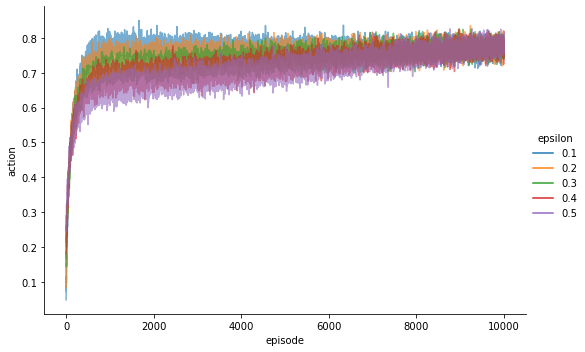

In [42]:
g = sns.relplot(x='episode', y='action', hue='epsilon', data=gdf, kind='line', aspect=1.5, alpha=0.6)